# **Trabalho de Conclusão de Curso Master BI - PUC RJ **

Aluno: Richard Peters

Turma: 2019.4


O objetivo deste trabalho é avaliar a base de dados de uma empresa de Óleo e Gás a qual deseja ser capaz de categorizar os tipos de falhas em seus poços, através dos 170 dados de sensores, entre "Superfície" (Surface) e "Fundo" (Downhole). A partir do algoritmo deste trabalho, a empresa será capaz de planejar de forma otimizada a disponibilidade de recursos necessários para intervenção e correção de uma nova falha, pois cada um dos cenários possuem distintas necessidades de equipamentos, equipe e investimentos. 

# 1.0 - Inicialização do Algoritmo


In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import itertools
from subprocess import check_output
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, Conv1D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import (BatchNormalization, Activation)
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from keras.callbacks import EarlyStopping

%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
workdir_path = '/content/drive/My Drive/PUC/TCC'  
os.chdir(workdir_path)

Mounted at /content/drive


# 2.0 - Análise Exploratória das Bases de Dados

In [ ]:
## Cria a base de dados a partir do arquivo ".csv".

ref_df = pd.read_csv('equip_failures_training_set.csv', header = None)
ref_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171
0,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
1,1,0,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
2,2,0,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,...,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
3,3,0,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
4,4,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,59996,0,153002,na,664,186,0,0,0,0,0,2564,59100,1603216,6015982,1968266,164972,12560,4880368,0,280,0,1224,2114,8913782,7998174,1929126,776370,2,0,0,0,3328,1080,0,0,0,0,0,45114,...,0,1872932,4936,1600,0,0,0,0,0,0,0,0,62846,137050,27546,0,0,265640,54496,470800,293652,0,0,0,0,80125300,2912.04,2858,1608808,1479066,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59997,59997,0,2286,na,2130706538,224,0,0,0,0,0,0,104,99186,36564,128,0,0,56982,0,0,0,0,0,123604,108768,24020,11622,0,0,0,0,192,56,0,0,0,0,0,4610,...,10,124152,114,56,0,0,0,0,0,0,0,0,1066,808,600,0,0,2450,510,823720,82346,16440,20,0,0,

In [ ]:
## Remove a coluna ID.

ref_df = ref_df.drop(columns=0)
ref_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171
0,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
1,0,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
2,0,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,...,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
3,0,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
4,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,0,153002,na,664,186,0,0,0,0,0,2564,59100,1603216,6015982,1968266,164972,12560,4880368,0,280,0,1224,2114,8913782,7998174,1929126,776370,2,0,0,0,3328,1080,0,0,0,0,0,45114,2533260,...,0,1872932,4936,1600,0,0,0,0,0,0,0,0,62846,137050,27546,0,0,265640,54496,470800,293652,0,0,0,0,80125300,2912.04,2858,1608808,1479066,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59997,0,2286,na,2130706538,224,0,0,0,0,0,0,104,99186,36564,128,0,0,56982,0,0,0,0,0,123604,108768,24020,11622,0,0,0,0,192,56,0,0,0,0,0,4610,99120,...,10,124152,114,56,0,0,0,0,0,0,0,0,1066,808,600

In [ ]:
## Remove primeira linha (antigo header).

ref_df = ref_df.drop(axis = 0,index = 0)
ref_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171
1,0,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
2,0,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,...,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
3,0,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
4,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
5,0,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,2128914,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,0,153002,na,664,186,0,0,0,0,0,2564,59100,1603216,6015982,1968266,164972,12560,4880368,0,280,0,1224,2114,8913782,7998174,1929126,776370,2,0,0,0,3328,1080,0,0,0,0,0,45114,2533260,...,0,1872932,4936,1600,0,0,0,0,0,0,0,0,62846,137050,27546,0,0,265640,54496,470800,293652,0,0,0,0,80125300,2912.04,2858,1608808,1479066,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59997,0,2286,na,2130706538,224,0,0,0,0,0,0,104,99186,36564,128,0,0,56982,0,0,0,0,0,123604,108768,24020,11622,0,0,0,0,192,56,0,0,0,0,0,4610,99120,...,10,124152,114,56,0,0,0,0,0,0,0,0,1066,808,600,0,0,2450,510,823720,82346,16440,20,0,0,1285980,80.4,82,13934,15024,10578,6760,21126,68424,136,0,0,0,0,0
59998,0,112,0,2130706432,18,0,0,0,0,0,0,28,11592,11538,0,0,0,8784,0,0,0,0,0,29698,23762,13970,874,0,0,0,0,36,20,0,0,0,0,0,0,0,...,0,8864,148,74,0,7042,0,0,0,0,0,0,622,0,0,4544,2398,162,58,7920,784,9112,0,0,0,0,2.76,134,15876,2740,792,386,452,144,146,2622,0,0,0,0
59999,0,80292,na,2130706432,494,0,0,0,0,0,0,330,202498,3251010,2061456,360436,59754,2634394,0,0,0,0,0,4543410,3227856,1615634,1214970,0,0,57300,0,2124,1090,0,0,0,0,0,119742,4445146,...,22,4858834,5598,284,0,0,190,106152,0,0,0,0,79230,37162,18388,0,0,166748,40564,25232340,5648346,0,0,0,0,39881280,1659.7,1908,1180714,1709450,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [ ]:
## Como alguns dados não são numéricos, por exemplo os 'na', o programa mostra como se não houvesse incidência de valores nulos/vazios.

NAN = ref_df.isna().sum()
NAN

1      0
2      0
3      0
4      0
5      0
      ..
167    0
168    0
169    0
170    0
171    0
Length: 171, dtype: int64

In [ ]:
## Garante que todos os dados são numéricos, e trata aqueles que não conseguiram ser interpretados.

ref_df = ref_df.apply(pd.to_numeric, errors='coerce')

In [ ]:
## Uma vez que os dados foram tratados na linha anterior, podemos ter uma noção de quantidade de dados "ausentes" na base, os quais podem fazer com que um atributo não seja representativo para o treinamento da base.

NAN1 = ref_df.isna().sum()
NAN1.values

array([    0,     0, 46329,  3335, 14861,  2500,  2500,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   645,
         629,   629,  4400,   642,   629,   642,   589,   642,   589,
        2723,   629,   629,   629,  2500,  2501,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   688,
         688,   688,   688,   688,   688,   688,   688,   688,   688,
         645,  2725,  2727,  2503,  2500,   642,   642,   589,   589,
       23034, 27277, 39549, 44009, 46333, 47740, 48722, 49264,   726,
         167,   691,   691,  3257,   473,  2723,  4356,   726,  3255,
         676,  2502, 14861, 14861, 14861,   338,   338,   338,  9553,
        9877,   687,   687,   687,   687,   687,   687,   687,   687,
         687,   687, 14861,  2724,   691, 46329,   669,   669,   669,
         669,   669,   669,   669,   669,   669,   669, 13808, 13808,
       13808, 13808,

In [ ]:
## Identificamos a porcentagem de na/NAN que temos em cada atributo em relação ao total de dados daquele atributo.

percent_NAN = (NAN1.values/60000)*100
percent_NAN

array([ 0.        ,  0.        , 77.215     ,  5.55833333, 24.76833333,
        4.16666667,  4.16666667,  1.11833333,  1.11833333,  1.11833333,
        1.11833333,  1.11833333,  1.11833333,  1.11833333,  1.11833333,
        1.11833333,  1.11833333,  1.075     ,  1.04833333,  1.04833333,
        7.33333333,  1.07      ,  1.04833333,  1.07      ,  0.98166667,
        1.07      ,  0.98166667,  4.53833333,  1.04833333,  1.04833333,
        1.04833333,  4.16666667,  4.16833333,  1.11833333,  1.11833333,
        1.11833333,  1.11833333,  1.11833333,  1.11833333,  1.11833333,
        1.11833333,  1.11833333,  1.11833333,  1.11833333,  1.11833333,
        1.11833333,  1.11833333,  1.11833333,  1.11833333,  1.11833333,
        1.11833333,  1.11833333,  1.11833333,  1.14666667,  1.14666667,
        1.14666667,  1.14666667,  1.14666667,  1.14666667,  1.14666667,
        1.14666667,  1.14666667,  1.14666667,  1.075     ,  4.54166667,
        4.545     ,  4.17166667,  4.16666667,  1.07      ,  1.07

In [ ]:
## Retorna o valor da maior porcentagem de valores nulos em um único atributo da base.

percent_NAN.max()

82.10666666666665

In [ ]:
## Indentifica quais colunas possuem quantidade de NAN acima de 30% de seu total.

dp = percent_NAN
dp = dp>30
dp

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
## Remove as colunas com % de NAN superior a 30%.

i=0
j=0
while i < 171:
  if dp[i] == True:
      col = i+1
      ref_df = ref_df.drop(columns=col)
      j+=1
      i+=1
      print('i=',i)
      print('j=',j);
  else:
      i+=1;
      print('i=',i)
;

ref_df

i= 1
i= 2
i= 3
j= 1
i= 4
i= 5
i= 6
i= 7
i= 8
i= 9
i= 10
i= 11
i= 12
i= 13
i= 14
i= 15
i= 16
i= 17
i= 18
i= 19
i= 20
i= 21
i= 22
i= 23
i= 24
i= 25
i= 26
i= 27
i= 28
i= 29
i= 30
i= 31
i= 32
i= 33
i= 34
i= 35
i= 36
i= 37
i= 38
i= 39
i= 40
i= 41
i= 42
i= 43
i= 44
i= 45
i= 46
i= 47
i= 48
i= 49
i= 50
i= 51
i= 52
i= 53
i= 54
i= 55
i= 56
i= 57
i= 58
i= 59
i= 60
i= 61
i= 62
i= 63
i= 64
i= 65
i= 66
i= 67
i= 68
i= 69
i= 70
i= 71
i= 72
i= 73
j= 2
i= 74
j= 3
i= 75
j= 4
i= 76
j= 5
i= 77
j= 6
i= 78
j= 7
i= 79
j= 8
i= 80
j= 9
i= 81
i= 82
i= 83
i= 84
i= 85
i= 86
i= 87
i= 88
i= 89
i= 90
i= 91
i= 92
i= 93
i= 94
i= 95
i= 96
i= 97
i= 98
i= 99
i= 100
i= 101
i= 102
i= 103
i= 104
i= 105
i= 106
i= 107
i= 108
i= 109
i= 110
i= 111
i= 112
i= 113
i= 114
j= 10
i= 115
i= 116
i= 117
i= 118
i= 119
i= 120
i= 121
i= 122
i= 123
i= 124
i= 125
i= 126
i= 127
i= 128
i= 129
i= 130
i= 131
i= 132
i= 133
i= 134
i= 135
i= 136
i= 137
i= 138
i= 139
i= 140
i= 141
i= 142
i= 143
i= 144
i= 145
i= 146
i= 147
i= 148
i= 149
i= 150
i= 151


,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171
1,0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
2,0,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,...,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
3,0,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
4,0,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2038.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
5,0,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,819596.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,0,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,1603216.0,6015982.0,1968266.0,164972.0,12560.0,4880368.0,0.0,280.0,0.0,1224.0,2114.0,8913782.0,7998174.0,1929126.0,776370.0,2.0,0.0,0.0,0.0,3328.0,1080.0,0.0,0.0,0.0,0.0,0.0,45114.0,2533260.0,2542338.0,...,0.0,1872932.0,4936.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62846.0,137050.0,27546.0,0.0,0.0,265640.0,54496.0,470800.0,293652.0,0.0,0.0,0.0,0.0,80125300.0,2912.04,2858.0,1608808.0,1479066.0,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59997,0,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,99186.0,36564.0,128.0,0.0,0.0,56982.0,0.0,0.0,0.0,0.0,0.0,123604.0,108768.0,24020.0,11622.0,0.0,0.0,0.0,0.0,192.0,56.0,0.0,0.0,0.0,0.0,0.0,4610.0,99120.0,11292.0,...,10.0,124152.0,114.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1066.0,808.0,600.0,0.0,0.0,2450.0,510.0,823720.0,82346.0,16440.0,20.0,0.0,0.0,1285980.0,80.40,82.0,13934

In [ ]:
## Reseta os indexes do dataframe para garantir que não existem "buracos" na lista de dados.

ref_df.reset_index(drop = True)

,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171
0,0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,...,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2038.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,819596.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,1603216.0,6015982.0,1968266.0,164972.0,12560.0,4880368.0,0.0,280.0,0.0,1224.0,2114.0,8913782.0,7998174.0,1929126.0,776370.0,2.0,0.0,0.0,0.0,3328.0,1080.0,0.0,0.0,0.0,0.0,0.0,45114.0,2533260.0,2542338.0,...,0.0,1872932.0,4936.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62846.0,137050.0,27546.0,0.0,0.0,265640.0,54496.0,470800.0,293652.0,0.0,0.0,0.0,0.0,80125300.0,2912.04,2858.0,1608808.0,1479066.0,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,99186.0,36564.0,128.0,0.0,0.0,56982.0,0.0,0.0,0.0,0.0,0.0,123604.0,108768.0,24020.0,11622.0,0.0,0.0,0.0,0.0,192.0,56.0,0.0,0.0,0.0,0.0,0.0,4610.0,99120.0,11292.0,...,10.0,124152.0,114.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1066.0,808.0,600.0,0.0,0.0,2450.0,510.0,823720.0,82346.0,16440.0,20.0,0.0,0.0,1285980.0,80.40,82.0,13934

In [ ]:
##  Nesta etapa, todos os campos "na" do dataframe são substituidos pela média dos valores do DF com a função "df.mean()".

ref_df = ref_df.fillna(ref_df.mean()) 

In [ ]:
## Dividindo o "df" entre treino e teste. 

X = (ref_df.iloc[:,0:].values).astype('float32')
Y = (ref_df.iloc[:,0].values).astype('int32')

x_treino, x_teste, y_treino, y_verdadeiro = train_test_split(X, Y, test_size=0.15, random_state=10)

In [ ]:
## Normalizando os dados.
 
scaler = MinMaxScaler()
x_treino = scaler.fit_transform(x_treino)
x_treino = scaler.transform(x_treino)
x_teste = scaler.transform(x_teste)
x_treino.shape

(51000, 161)

# 3.0 Treino e Teste do Modelo

In [ ]:
## Cria o Modelo da Rede

model = Sequential()

## Camada de Entrada
model.add(Dense(128, activation='linear', input_shape = (161,)))
model.add(Dropout(0.4))

## Camada Escondida #1
model.add(Dense(64, activation='linear'))
model.add(BatchNormalization())

## Camada Escondida #2
model.add(Dense(32, activation='linear'))

## Camada de Saida
model.add(Dense(1, activation='sigmoid'))

# Define o otimizador SGD com reduce learning rate
learning_rate = 0.3
decay_rate =0.001 
momentum = 0.95

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

model.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy']) 
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               20736     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
## Realiza treino da Rede.

rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001) #caso não queira usar esse Reduce, comentar essa linha e remover o rlr do .fit().
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) # Se utilizado accurary, então o mode deve ser "max".
Treino = model.fit(x_treino, y_treino,validation_split= 0.2, epochs=100, callbacks = [es,rlr]) # Callbacks é usado para aplicar o early stopping definido em "es" e o reduce LR em "rlr".


Epoch 1/100
1275/1275 [==============================] - 4s 3ms/step - loss: 0.1330 - accuracy: 0.9695 - val_loss: 0.0832 - val_accuracy: 0.9838 - lr: 0.0100
Epoch 2/100
1275/1275 [==============================] - 3s 2ms/step - loss: 0.0873 - accuracy: 0.9832 - val_loss: 0.0829 - val_accuracy: 0.9838 - lr: 0.0100
Epoch 3/100
1275/1275 [==============================] - 3s 2ms/step - loss: 0.0871 - accuracy: 0.9832 - val_loss: 0.0831 - val_accuracy: 0.9838 - lr: 0.0100
Epoch 4/100
1275/1275 [==============================] - 3s 3ms/step - loss: 0.0872 - accuracy: 0.9832 - val_loss: 0.0833 - val_accuracy: 0.9838 - lr: 0.0100
Epoch 5/100
1275/1275 [==============================] - 3s 2ms/step - loss: 0.0870 - accuracy: 0.9832 - val_loss: 0.0828 - val_accuracy: 0.9838 - lr: 0.0100
Epoch 6/100
1275/1275 [==============================] - 3s 3ms/step - loss: 0.0868 - accuracy: 0.9832 - val_loss: 0.0831 - val_accuracy: 0.9838 - lr: 0.0100
Epoch 7/100
1275/1275 [=============================

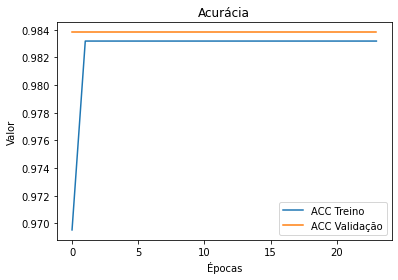

In [ ]:
## Imprime gráfico da acurácia durante o treino

plt.plot(Treino.history['accuracy'], label='ACC Treino')
plt.plot(Treino.history['val_accuracy'], label= 'ACC Validação')
plt.legend()
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.savefig(fname='Acurácia_MLP5.jpeg',edgecolor='b',dpi=300)

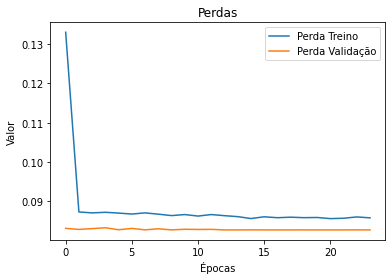

In [ ]:
## Imprime resultado de perda do treino

plt.plot(Treino.history['loss'],label='Perda Treino')
plt.plot(Treino.history['val_loss'], label='Perda Validação')
plt.legend()
plt.title('Perdas')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.savefig(fname='Perda_MLP5.jpeg',edgecolor='b',dpi=300)

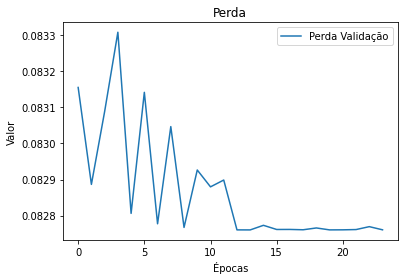

In [ ]:
## salva gráficos de perda durante validação.

plt.plot(Treino.history['val_loss'], label= 'Perda Validação')
plt.legend()
plt.title('Perda')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.savefig(fname='Val_Perda_MLP5.jpeg',edgecolor='b',dpi=300)

In [ ]:
## Cria o array com a predição do alvo.

y_predict = model.predict(x_teste)

In [ ]:
## Verifica o array criado pelo modelo.

y_predict

array([[0.01408437],
       [0.01408437],
       [0.0140844 ],
       ...,
       [0.0140844 ],
       [0.0140844 ],
       [0.01408437]], dtype=float32)

In [ ]:
## Verifica o formato do array criado pelo modelo.

y_predict.shape

(9000, 1)

In [ ]:
## Verifica o array de verificação.

y_verdadeiro

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
## Verifica o formato do array de verificação.

y_verdadeiro.shape

(9000,)

In [ ]:
## Arrendonda o valor previsto de forma que ele fique entre as classes "0" e "1".

preds = model.predict(x_teste)
print(preds)
preds2 = np.array([int(i>=0.90) for i in preds])
print(preds2)


[[0.01408437]
 [0.01408437]
 [0.0140844 ]
 ...
 [0.0140844 ]
 [0.0140844 ]
 [0.01408437]]
[0 0 0 ... 0 0 0]


# 4.0 Validação da Performance do Modelo

In [ ]:
## Valida o resultado do modelo (predição) quando comparado com o valor real esperado.

precision_recall_fscore_support(y_verdadeiro,preds2, average='macro',zero_division=1)

(0.9917222222222222, 0.5, 0.4958265643381323, None)

In [ ]:
## Salva resultados em arquivos ".csv".

print1 = pd.DataFrame(y_verdadeiro, columns=['result'])
print2 = pd.DataFrame(y_predict, columns=['result'])

print1.to_csv(path_or_buf='y_verdadeiro_MLP5.csv', index=True, header=True)
print2.to_csv(path_or_buf='y_predict_MLP5.csv', index=True, header=True)